# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Geschat vermogen P = 46.09 W


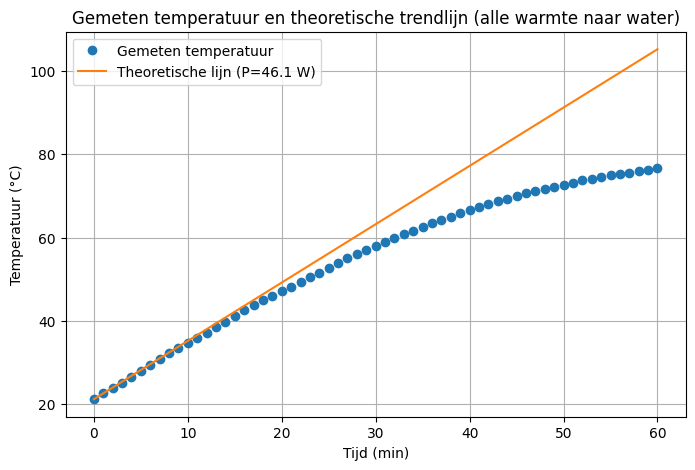

In [30]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

m_mb = 0.8208
m_mw1 = 1.2929
m_mw2 = 1.2749
m_w1 = m_mw1 - m_mb
m_w2 = m_mw2 - m_mb
dm = m_w2 - m_w1

data = np.loadtxt(r"C:\Users\tijnj\OneDrive - Delft University of Technology\TN  25-26\Inleidend practicum 2\IP2_1\Content\Labs\tempmetingen-0203356cbb854ce862d0304505c4ede5.csv", delimiter=';', skiprows=1)

t_min = data[:, 0]
t = t_min * 60.0
T = data[:, 1]
T0 = T[0]

c = 4184.0
P = None

if P is None:
    coef = np.polyfit(t[:3], T[:3], 1)
    slope = coef[0]
    P = c * m_w1 * slope
    print(f"Geschat vermogen P = {P:.2f} W")

T_exp = T0 + (P / (c * m_w1)) * t

plt.figure(figsize=(8,5))
plt.plot(t_min, T, 'o', label='Gemeten temperatuur')
plt.plot(t_min, T_exp, '-', label=f"Theoretische lijn (P={P:.1f} W)")
plt.xlabel("Tijd (min)")
plt.ylabel("Temperatuur (°C)")
plt.title("Gemeten temperatuur en theoretische trendlijn (alle warmte naar water)")
plt.legend()
plt.grid(True)
plt.show()